In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import tikzplotlib as tpl

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size']   = 12

In [3]:
PlotSize = (10, 10)

In [4]:
def numpyfy_dict(d):
    for k in d:
        d[k] = np.array(d[k])
    return d

def numpyfy_dict_of_dicts(d):
    for k in d:
        d[k] = numpyfy_dict(d[k])
    return d


In [5]:
# load the data for constant lambda, lambda error and lambda loss

lambda_ = 0.001  # ou lambda = 0.0001 ou 1.0

const_lambda_input_files = {
    "bootstrap_bootstrap" :f"../data/ridge/ridge_bootstrap_bootstrap_overlaps_lambda={lambda_}.json",
    "bootstrap_full"      :f"../data/ridge/ridge_bootstrap_full_overlaps_lambda={lambda_}.json",
    "full_full"           :f"../data/ridge/ridge_full_full_overlaps_lambda={lambda_}.json",
    "y_resampling"        :f"../data/ridge/ridge_y_resampling_overlaps_lambda={lambda_}.json",
    "residual_bootstrap"  :f"../data/ridge/ridge_residual_bootstrap_overlaps_lambda={lambda_}.json",
}

const_lambda_overlaps = {
    "bootstrap_bootstrap" :json.load(open(const_lambda_input_files["bootstrap_bootstrap"], "r")),
    "bootstrap_full"      :json.load(open(const_lambda_input_files["bootstrap_full"], "r")),
    "full_full"           :json.load(open(const_lambda_input_files["full_full"], "r")),
    "y_resampling"           :json.load(open(const_lambda_input_files["y_resampling"], "r")),
    "residual_bootstrap"           :json.load(open(const_lambda_input_files["residual_bootstrap"], "r")),
}
const_lambda_alpha_range  = const_lambda_overlaps["full_full"]["alpha"]

const_lambda_overlaps = numpyfy_dict_of_dicts(const_lambda_overlaps)

---

# Constant $\lambda$

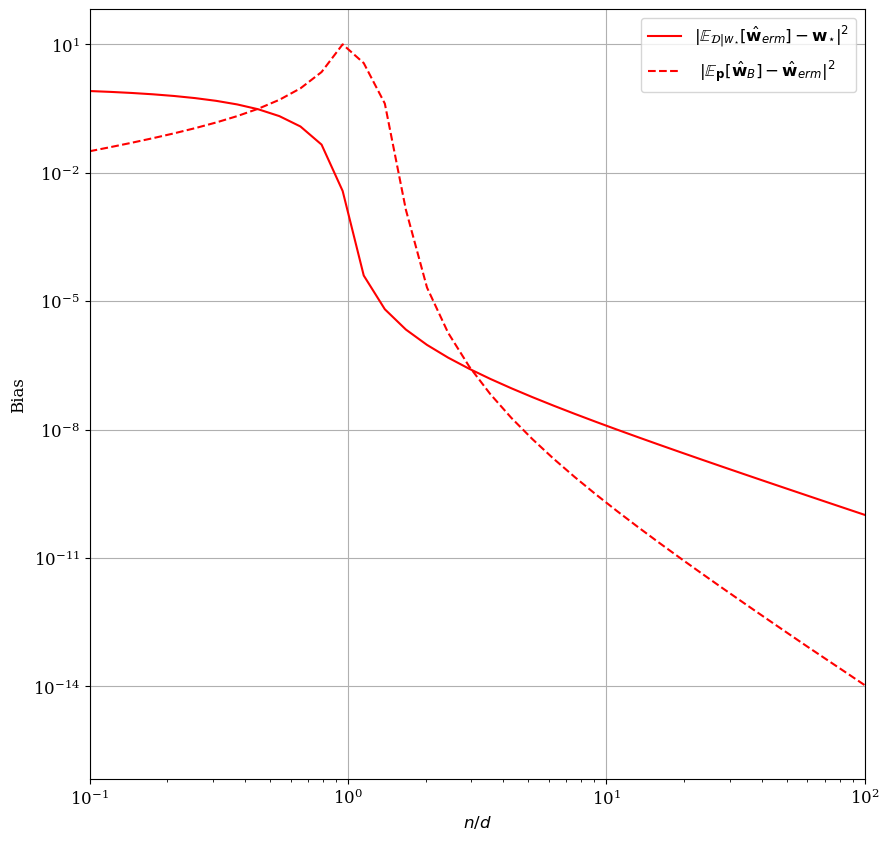

In [7]:
# BIAS OF ERM AND ITS ESTIMATION BY BOOTSTRAP

# store the bias of erm in full_full as we need these overlaps toc compute the bias
erm_bias            = 1.0 + const_lambda_overlaps["full_full"]["q_off_diag"] - 2 * const_lambda_overlaps["full_full"]["m"]
erm_bias_estimation = const_lambda_overlaps["bootstrap_full"]["q_full"] + const_lambda_overlaps["bootstrap_bootstrap"]["q_off_diag"] - 2 * const_lambda_overlaps["bootstrap_full"]["q_bootstrap_full"]

plt.figure(figsize = PlotSize)

plt.loglog(const_lambda_alpha_range, erm_bias, label="$\| \mathbb{E}_{\mathcal{D} | w_{\star}} [ \hat{\mathbf{w}}_{erm}] - \mathbf{w}_{\star} \|^2 $", c='r')
plt.loglog(const_lambda_alpha_range, np.abs(erm_bias_estimation), label=" $\| \mathbb{E}_{\mathbf{p}} [ \hat{\mathbf{w}}_{B}] - \hat{\mathbf{w}}_{erm}\|^2 $", c='r', linestyle='--')

plt.grid()
plt.legend()

plt.xlim( min(const_lambda_alpha_range), 1e2)
plt.xlabel("$n / d$")
plt.ylabel("Bias")

tpl.save(f"../fig/ridge_regression_lambda={lambda_}_bias.tex")

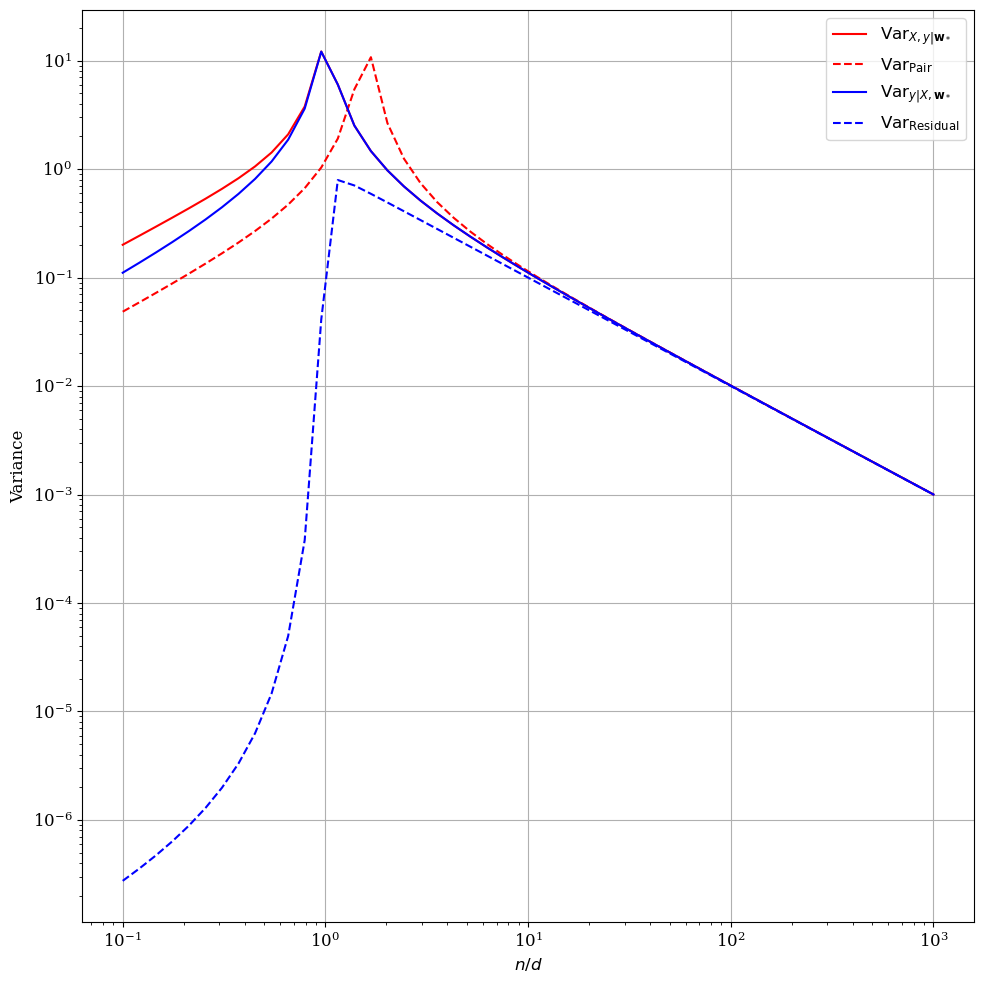

In [9]:
# VARIANCE OF THE RESAMPLING 

plt.figure(figsize=PlotSize)

const_lambda_overlaps["full_full"]["variance"] = const_lambda_overlaps["full_full"]["q_diag"] - const_lambda_overlaps["full_full"]["q_off_diag"]
const_lambda_overlaps["bootstrap_bootstrap"]["variance"] = const_lambda_overlaps["bootstrap_bootstrap"]["q_diag"] - const_lambda_overlaps["bootstrap_bootstrap"]["q_off_diag"]
const_lambda_overlaps["y_resampling"]["variance"] = const_lambda_overlaps["y_resampling"]["q_diag"] - const_lambda_overlaps["y_resampling"]["q_off_diag"]
const_lambda_overlaps["residual_bootstrap"]["variance"] = const_lambda_overlaps["residual_bootstrap"]["q_diag_residual"] - const_lambda_overlaps["residual_bootstrap"]["q_off_diag_residual"]

plt.loglog(const_lambda_alpha_range, const_lambda_overlaps["full_full"]["variance"], label="${\\rm Var}_{X, y | \mathbf{w}_*}$", c='r')
plt.loglog(const_lambda_alpha_range, const_lambda_overlaps["bootstrap_bootstrap"]["variance"], label="${\\rm Var}_{\\rm Pair}$", linestyle='--', c='r')
plt.loglog(const_lambda_alpha_range, const_lambda_overlaps["y_resampling"]["variance"], label="${\\rm Var}_{y | X, \mathbf{w}_*}$", c='b')
plt.loglog(const_lambda_alpha_range, const_lambda_overlaps["residual_bootstrap"]["variance"], c='b', linestyle='--', label='${\\rm Var}_{\\rm Residual}$')

plt.grid()
plt.legend()
plt.xlabel("$n / d$")
plt.ylabel("Variance")
plt.tight_layout()

tpl.save(f"../fig/ridge_regression_lambda={lambda_}_variance.tex")

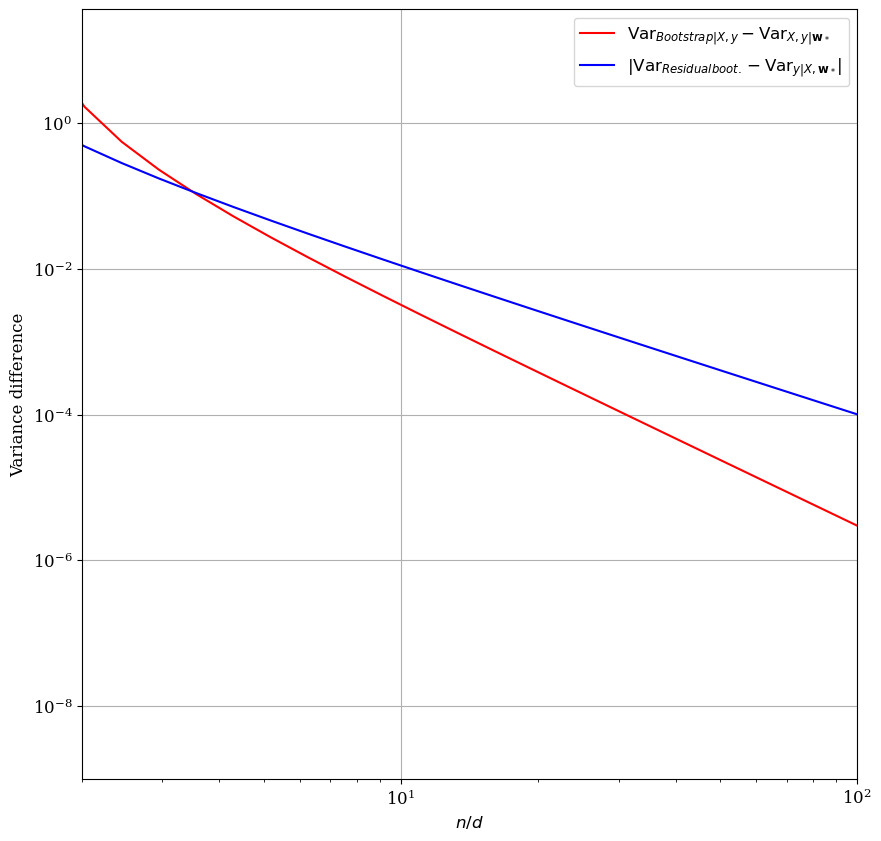

In [11]:
# plot the difference between the variances

plt.figure(figsize=PlotSize)

plt.loglog(const_lambda_alpha_range, np.abs(const_lambda_overlaps["bootstrap_bootstrap"]["variance"] - const_lambda_overlaps["full_full"]["variance"]), label='${\\rm Var}_{Bootstrap | X, y} - {\\rm Var}_{X, y | \mathbf{w}_*}$', c='r')
plt.loglog(const_lambda_alpha_range, np.abs(const_lambda_overlaps["y_resampling"]["variance"] - const_lambda_overlaps["residual_bootstrap"]["variance"]), label = '$|{\\rm Var}_{Residual boot.} - {\\rm Var}_{y | X, \mathbf{w}_*}$|', c='b')

plt.xlim( 2.0, 1e2)
plt.grid()
plt.xlabel("$n / d$")
plt.ylabel("Variance difference")
plt.legend()

tpl.save(f"../fig/ridge_regression_lambda={lambda_}_variance_difference.tex")